In [84]:
import numpy as np
import matplotlib.pyplot as plt

In [85]:
def count_collisions(array1, array2, threshold=3):
    """
    Count number of trajectories that experience at least one collision 
    between corresponding trajectories in array1 and array2.

    Parameters:
        array1: np.ndarray of shape (n_traj, horizon, num_states)
        array2: np.ndarray of shape (n_traj, horizon, num_states)
        threshold: float, distance below which a collision is counted

    Returns:
        num_colliding_trajectories: int
    """
    assert array1.shape == array2.shape, "Arrays must have the same shape"

    # Compute pairwise distances along the trajectory (n_traj, horizon)
    distances = np.linalg.norm(array1 - array2, axis=2)

    # print(distances)

    # Check where distance is below threshold
    collision_mask = distances < threshold  # shape: (n_traj, horizon)

    # Count how many trajectories have at least one collision
    num_colliding_trajectories = np.sum(np.any(collision_mask, axis=1))

    return num_colliding_trajectories

In [86]:
import itertools

def count_collisions_multi(arrays, threshold=3.0):
    """
    Count how many trajectories have at least one collision among ANY pair of agents.

    Parameters
    ----------
    arrays : List[np.ndarray], each of shape (n_traj, horizon, num_states)
        One entry per agent.
    threshold : float
        Distance below which a collision is counted.

    Returns
    -------
    num_colliding_trajectories : int
        Number of trajectories (out of n_traj) where any two agents collide at least once.
    """
    # Basic sanity check
    n_traj, horizon, dims = arrays[0].shape
    for arr in arrays:
        assert arr.shape == (n_traj, horizon, dims), "All arrays must have same shape"

    # We'll accumulate a boolean mask of shape (n_traj, horizon)
    # that is True wherever ANY pair is closer than threshold
    collision_mask_any = np.zeros((n_traj, horizon), dtype=bool)

    # Loop over all unique pairs of agents
    for A, B in itertools.combinations(arrays, 2):
        # compute pairwise distance over time
        d = np.linalg.norm(A - B, axis=2)      # shape (n_traj, horizon)
        collision_mask_any |= (d < threshold)

    # Now count how many trajectories have at least one True in their mask
    num_colliding_trajectories = np.sum(collision_mask_any.any(axis=1))
    return num_colliding_trajectories


In [87]:
#  Diffusion MPC P25E5

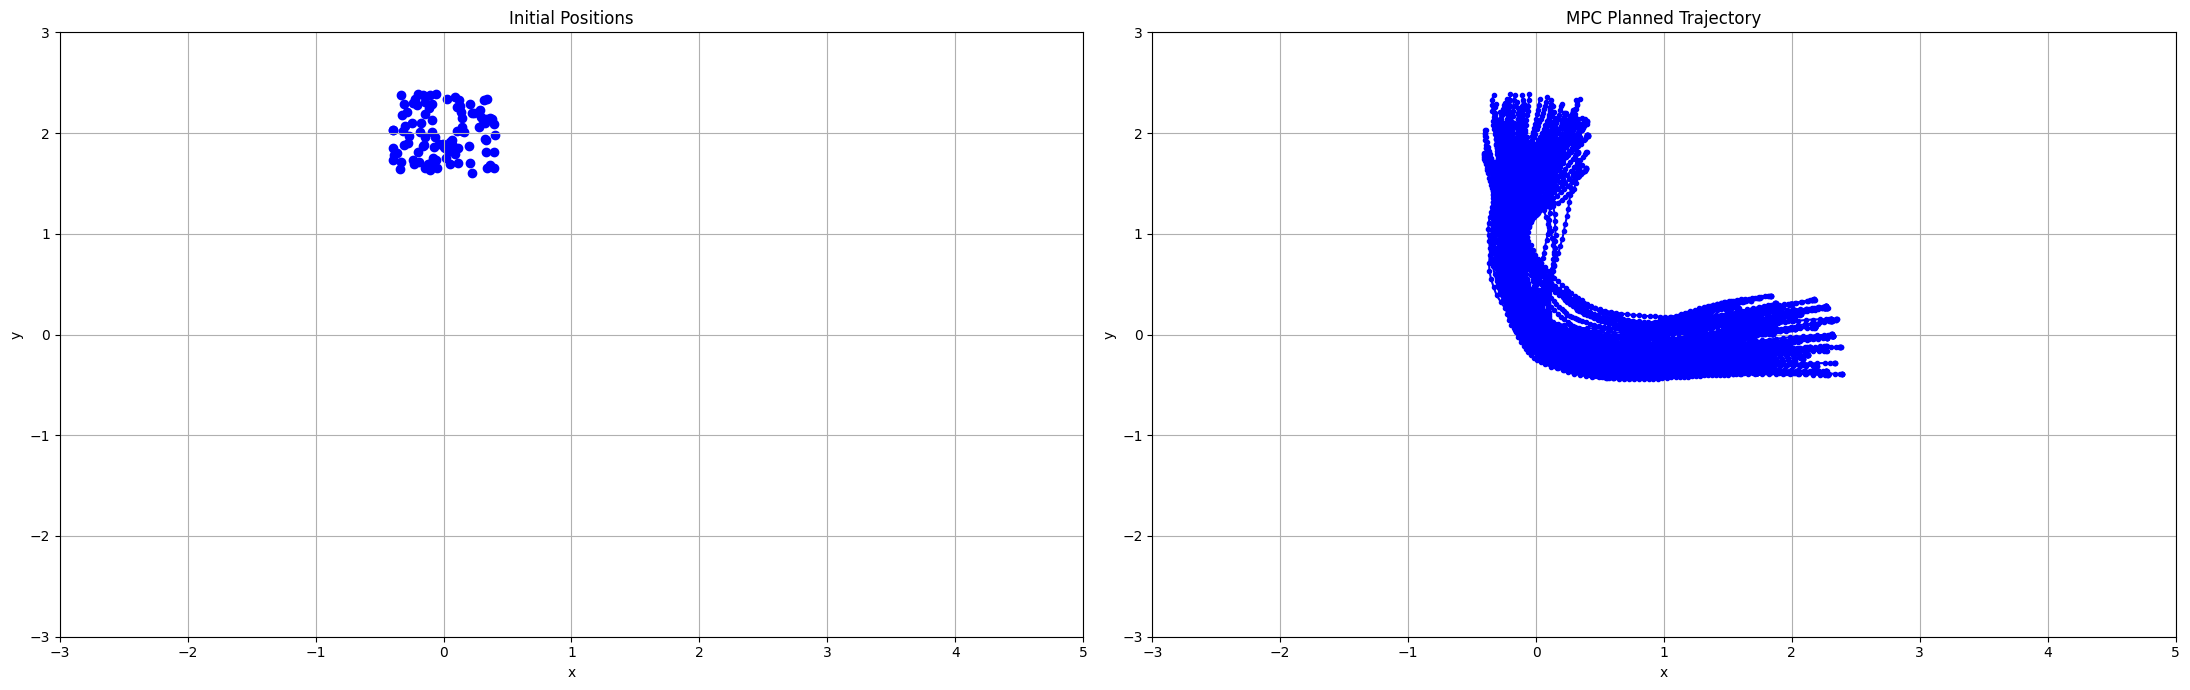

In [88]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 7))

ax1.set_xlim(-3, 5)
ax1.set_ylim(-3, 3)
ax1.grid(True)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Initial Positions")
initial_points1 = []
for i in range(100):
    data = np.load("sampled_trajs/mpc_P25E5_200demos_06demonoise_04samplenoise_1500N/traj1_%s.npy" % i)
    initial_points1.append(data)
    ax1.scatter(data[0, 0], data[0, 1], color='blue')


ax2.set_xlim(-3, 5)
ax2.set_ylim(-3, 3)
ax2.grid(True)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("MPC Planned Trajectory")
sampled_data1 = []
for i in range(100):
    data = np.load("sampled_trajs/mpc_P25E5_200demos_06demonoise_04samplenoise_1500N/traj1_%s.npy" % i)
    sampled_data1.append(data)
    ax2.plot(data[:, 0], data[:, 1], 'o-', color='blue', markersize=3)

plt.tight_layout()
plt.show()

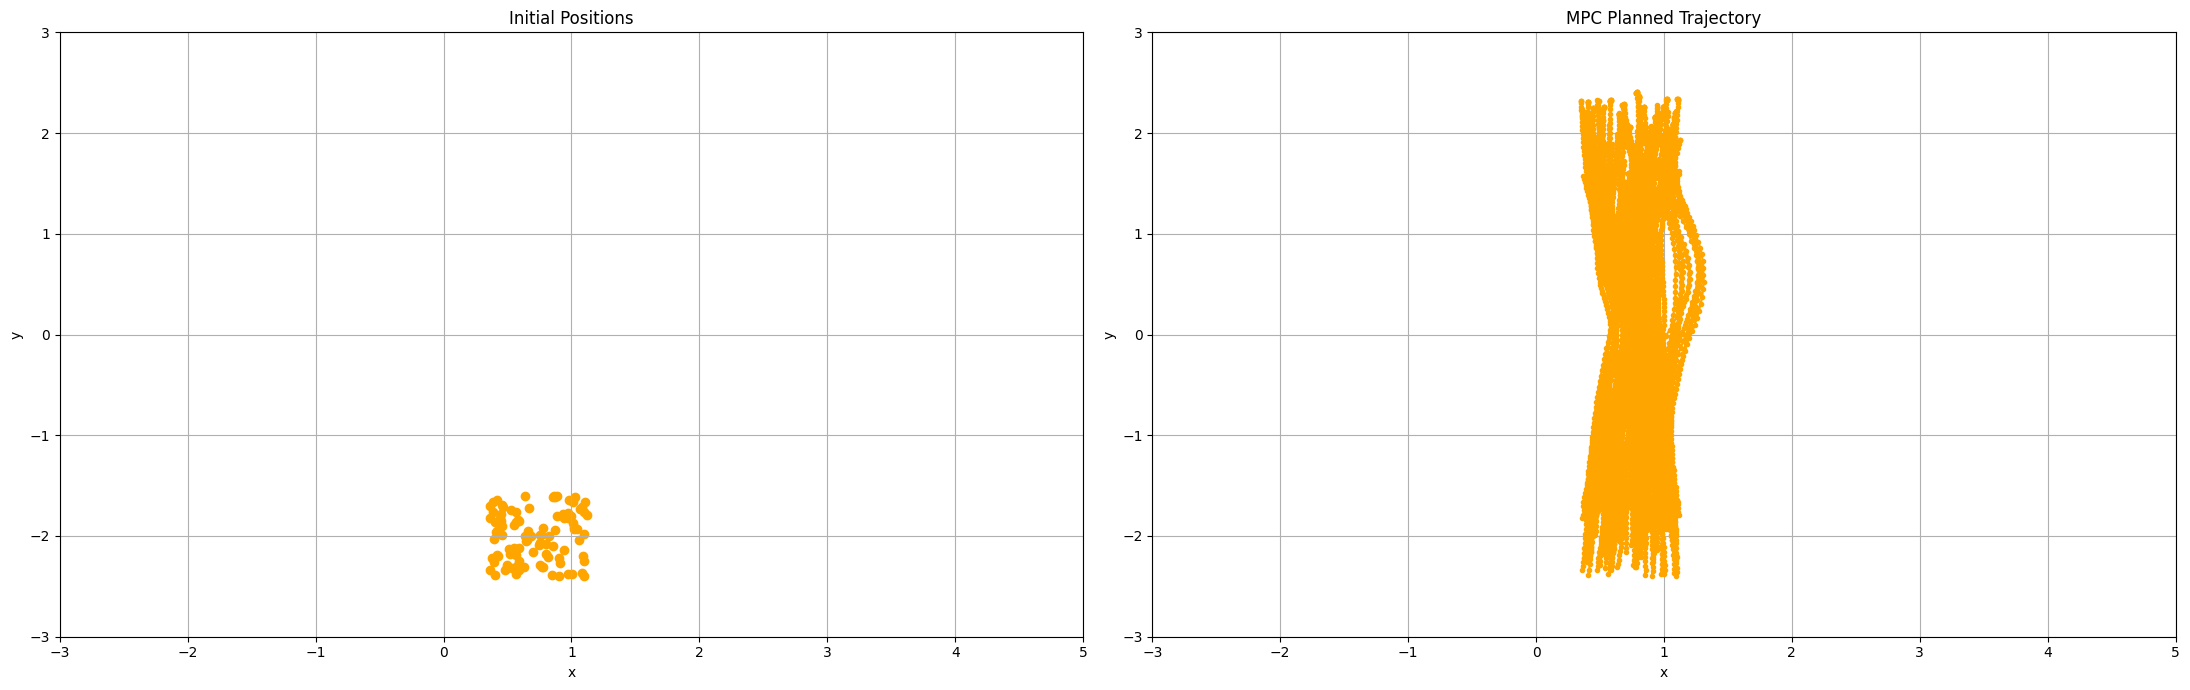

In [89]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 7))

ax1.set_xlim(-3, 5)
ax1.set_ylim(-3, 3)
ax1.grid(True)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Initial Positions")
initial_points2 = []
for i in range(100):
    data = np.load("sampled_trajs/mpc_P25E5_200demos_06demonoise_04samplenoise_1500N/traj2_%s.npy" % i)
    initial_points2.append(data)
    ax1.scatter(data[0, 0], data[0, 1], color='orange')


ax2.set_xlim(-3, 5)
ax2.set_ylim(-3, 3)
ax2.grid(True)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("MPC Planned Trajectory")
sampled_data2 = []
for i in range(100):
    data = np.load("sampled_trajs/mpc_P25E5_200demos_06demonoise_04samplenoise_1500N/traj2_%s.npy" % i)
    sampled_data2.append(data)
    ax2.plot(data[:, 0], data[:, 1], 'o-', color='orange', markersize=3)

plt.tight_layout()
plt.show()

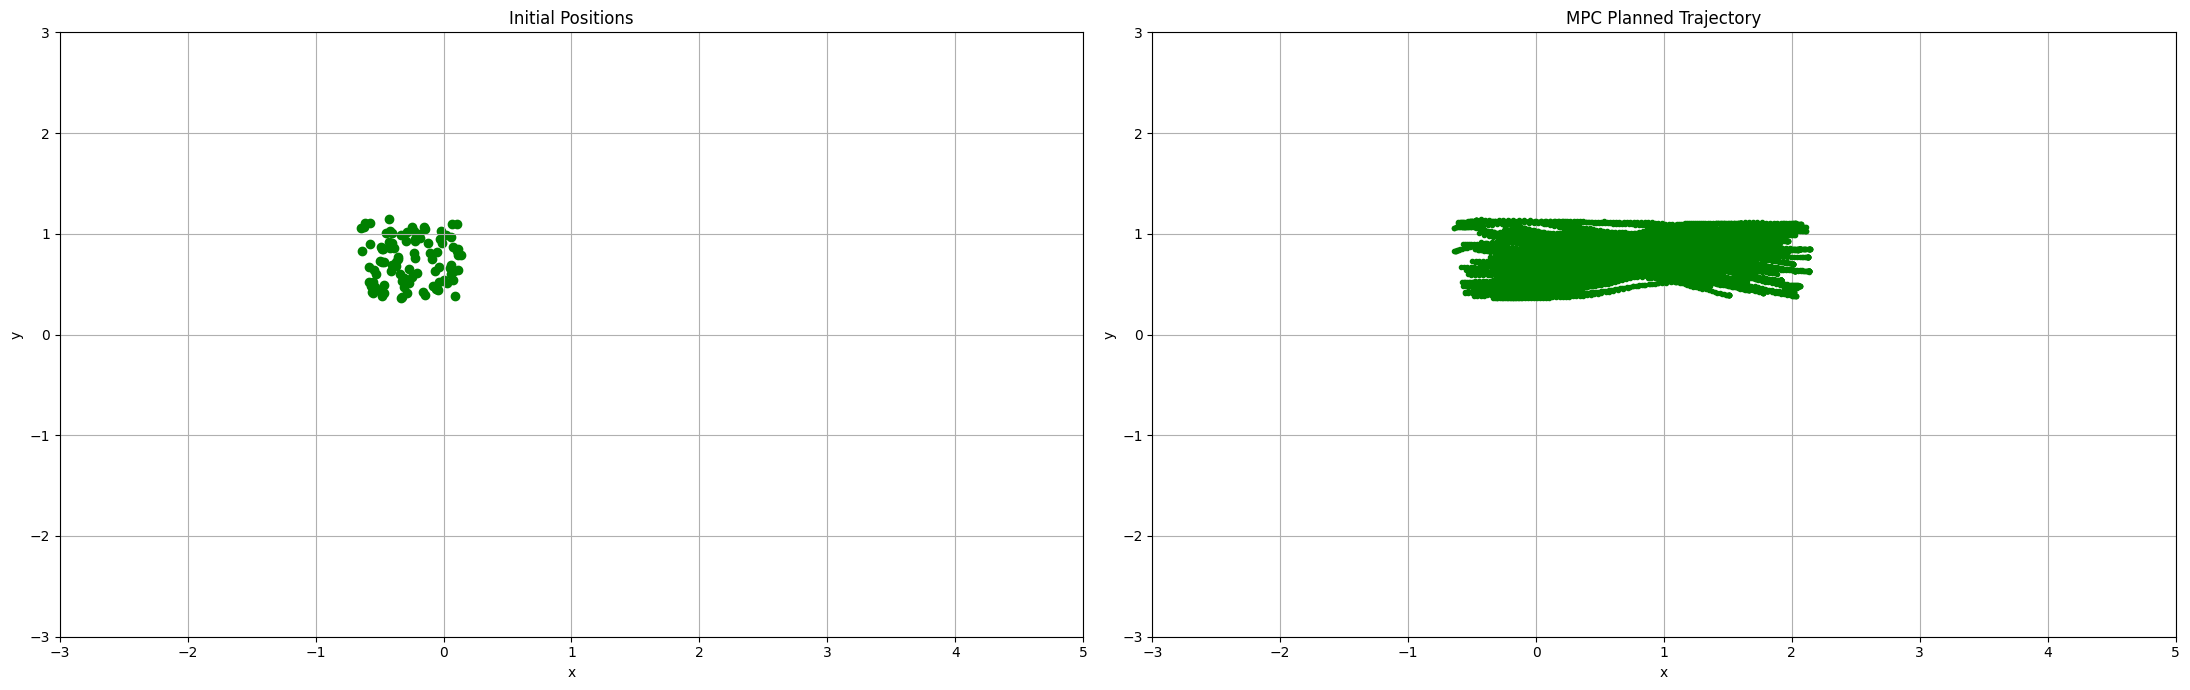

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 7))

ax1.set_xlim(-3, 5)
ax1.set_ylim(-3, 3)
ax1.grid(True)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Initial Positions")
initial_points3 = []
for i in range(100):
    data = np.load("sampled_trajs/mpc_P25E5_200demos_06demonoise_04samplenoise_1500N/traj3_%s.npy" % i)
    initial_points3.append(data)
    ax1.scatter(data[0, 0], data[0, 1], color='green')


ax2.set_xlim(-3, 5)
ax2.set_ylim(-3, 3)
ax2.grid(True)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("MPC Planned Trajectory")
sampled_data3 = []
for i in range(100):
    data = np.load("sampled_trajs/mpc_P25E5_200demos_06demonoise_04samplenoise_1500N/traj3_%s.npy" % i)
    sampled_data3.append(data)
    ax2.plot(data[:, 0], data[:, 1], 'o-', color='green', markersize=3)

plt.tight_layout()
plt.show()

In [91]:
# count_collisions(np.array(sampled_data1), np.array(sampled_data2), np.array(sampled_data3), threshold=1)

In [99]:
count_collisions_multi([np.array(sampled_data1), np.array(sampled_data2), np.array(sampled_data3)], threshold=0.5)

np.int64(53)

In [93]:
def plot_colliding_trios(arrays, threshold=3.0, max_plots=None):
    """
    Plot trajectories of any trio of agents that collide.

    Parameters
    ----------
    arrays : list of 3 np.ndarray
        Each of shape (n_traj, horizon, dims), where dims is 2 or 3.
    threshold : float
        Distance below which a collision is counted.
    max_plots : int or None
        Maximum number of colliding trajectories to plot. None => plot all.
    """
    # Check shapes
    n_traj, horizon, dims = arrays[0].shape
    for arr in arrays:
        assert arr.shape == (n_traj, horizon, dims), "All arrays must match shape"
    
    # Build collision mask: (n_traj, horizon)
    collision_mask = np.zeros((n_traj, horizon), dtype=bool)
    for A, B in itertools.combinations(arrays, 2):
        collision_mask |= (np.linalg.norm(A - B, axis=2) < threshold)
    
    # Find which trajectories collide
    colliding_idxs = np.where(collision_mask.any(axis=1))[0]
    if max_plots is not None:
        colliding_idxs = colliding_idxs[:max_plots]
    
    # Plot each colliding trajectory
    for idx in colliding_idxs:
        fig = plt.figure()
        if dims == 3:
            ax = fig.add_subplot(111, projection='3d')
        else:
            ax = fig.add_subplot(111)
        
        for i, arr in enumerate(arrays, start=1):
            traj = arr[idx]
            if dims == 3:
                ax.plot(traj[:,0], traj[:,1], traj[:,2], label=f'Agent {i}')
            else:
                ax.plot(traj[:,0], traj[:,1], label=f'Agent {i}')
        
        ax.set_title(f'Colliding Trajectory Index: {idx}')
        ax.set_xlabel('X'); ax.set_ylabel('Y')
        if dims == 3:
            ax.set_zlabel('Z')
        ax.legend()
        plt.show()


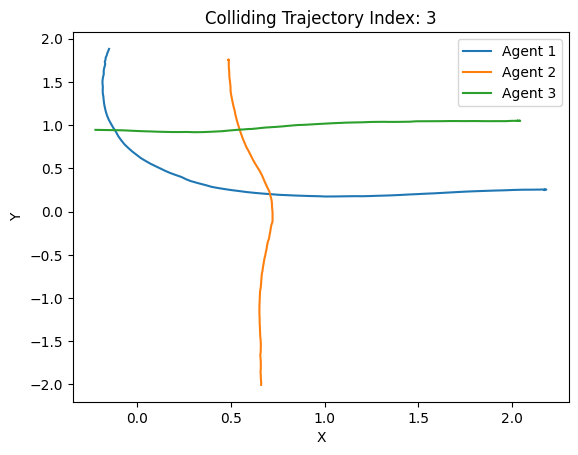

In [98]:
plot_colliding_trios([np.array(sampled_data1), np.array(sampled_data2), np.array(sampled_data3)], threshold=0.2, max_plots=1)

In [95]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necessary for '3d' projection
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

def animate_colliding_trios(arrays, threshold=3.0, max_plots=None, interval=100):
    """
    Animate colliding trajectories among three agents in a Jupyter Notebook.

    Parameters
    ----------
    arrays : list of 3 np.ndarray
        Each of shape (n_traj, horizon, dims), where dims is 2 or 3.
    threshold : float
        Distance below which a collision is flagged.
    max_plots : int or None
        Max number of colliding trajectories to animate; None => all.
    interval : int
        Delay between frames in milliseconds.
    """
    if not isinstance(arrays, list) or len(arrays) != 3:
        raise ValueError("Input 'arrays' must be a list of 3 numpy arrays.")
        
    n_traj, horizon, dims = arrays[0].shape
    for arr in arrays:
        assert arr.shape == (n_traj, horizon, dims), "All arrays must match shape"

    collision_mask = np.zeros((n_traj, horizon), dtype=bool)
    for A, B in itertools.combinations(arrays, 2):
        collision_mask |= (np.linalg.norm(A - B, axis=2) < threshold)
    
    colliding_idxs = np.where(collision_mask.any(axis=1))[0]
    
    if not colliding_idxs.any():
        print("No colliding trajectories found.")
        return

    if max_plots is not None:
        colliding_idxs = colliding_idxs[:max_plots]

    for idx in colliding_idxs:
        A, B, C = arrays[0][idx], arrays[1][idx], arrays[2][idx]
        
        d_ab = np.linalg.norm(A - B, axis=1)
        d_ac = np.linalg.norm(A - C, axis=1)
        d_bc = np.linalg.norm(B - C, axis=1)
        colliding_frames = (d_ab < threshold) | (d_ac < threshold) | (d_bc < threshold)

        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d' if dims == 3 else None)
        
        all_pts = np.concatenate([A, B, C], axis=0)
        ax.set_xlim(all_pts[:, 0].min() - 1, all_pts[:, 0].max() + 1)
        ax.set_ylim(all_pts[:, 1].min() - 1, all_pts[:, 1].max() + 1)
        if dims == 3:
            ax.set_zlim(all_pts[:, 2].min() - 1, all_pts[:, 2].max() + 1)
            
        ax.set_title(f'Colliding Trajectory #{idx}')
        ax.set_xlabel('X'); ax.set_ylabel('Y')
        if dims == 3:
            ax.set_zlabel('Z')

        line1, = ax.plot([], [], 'r-', label='Agent 1')
        line2, = ax.plot([], [], 'g-', label='Agent 2')
        line3, = ax.plot([], [], 'b-', label='Agent 3')
        
        # --- FIX 1: Initialize the scatter plot with no data and NO color array ---
        scat = ax.scatter([], [], s=50) 
        
        ax.legend()

        def init():
            line1.set_data([], [])
            line2.set_data([], [])
            line3.set_data([], [])
            if dims == 3:
                line1.set_3d_properties([])
                line2.set_3d_properties([])
                line3.set_3d_properties([])
                scat._offsets3d = ([], [], [])
            else:
                scat.set_offsets(np.empty((0, 2)))
            return line1, line2, line3, scat

        def update(frame):
            line1.set_data(A[:frame+1, 0], A[:frame+1, 1])
            line2.set_data(B[:frame+1, 0], B[:frame+1, 1])
            line3.set_data(C[:frame+1, 0], C[:frame+1, 1])
            
            current_positions = np.array([A[frame], B[frame], C[frame]])
            
            if dims == 3:
                line1.set_3d_properties(A[:frame+1, 2])
                line2.set_3d_properties(B[:frame+1, 2])
                line3.set_3d_properties(C[:frame+1, 2])
                scat._offsets3d = (current_positions[:, 0], current_positions[:, 1], current_positions[:, 2])
            else:
                scat.set_offsets(current_positions)
            
            # --- FIX 2: Set the colors dynamically on each frame ---
            if colliding_frames[frame]:
                scat.set_color('red') # Set a single color for all points during collision
                scat.set_sizes([150, 150, 150])
            else:
                scat.set_color(['r', 'g', 'b']) # Set individual colors for each agent
                scat.set_sizes([50, 50, 50])
                
            return line1, line2, line3, scat

        anim = FuncAnimation(fig, update, frames=horizon,
                             init_func=init, interval=interval, blit=False)

        display(HTML(anim.to_jshtml()))
        
        plt.close(fig)

In [96]:
animate_colliding_trios([np.array(sampled_data1), np.array(sampled_data2), np.array(sampled_data3)], threshold=0.2, max_plots=1, interval=100)

In [97]:
demos1 = np.load("data/expert_data1_200_traj_06_noise.npy")
demos2 = np.load("data/expert_data2_200_traj_06_noise.npy")
demos3 = np.load("data/expert_data3_200_traj_06_noise.npy")

count_collisions_multi([np.array(demos1), np.array(demos2), np.array(demos3)], threshold=0.74)

np.int64(0)